# Исследование объявлений о продаже квартир

Необходимо научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### Откроем файл с данными и изучим общую информацию 

In [1]:
import pandas as pd #импорт библиотеки pandas
import matplotlib.pyplot as plt #импорт модуля pyplot из matplotlib

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # читаем csv-файл

In [3]:
data.head(20) # смотрим в каком формате и состоянии данные

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23680,14,5000000.0,59.00,2019-04-04T00:00:00,3,2.50,5.0,52.0,1,NaN,...,7.00,NaN,Санкт-Петербург,26835.0,11878.0,0.0,NaN,0.0,NaN,NaN
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,29.0,2,NaN,...,6.00,NaN,Санкт-Петербург,28323.0,7262.0,1.0,497.0,2.0,660.0,80.0
23682,11,2350000.0,35.60,2016-06-23T00:00:00,1,2.50,5.0,17.0,4,False,...,8.30,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.5,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,NaN,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23686,8,3300000.0,31.00,2017-04-29T00:00:00,1,2.55,9.0,18.0,6,NaN,...,6.50,0.0,Санкт-Петербург,11751.0,11602.0,1.0,140.0,1.0,317.0,193.0
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.00,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.00,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.00,NaN,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Исходя их данных, видно достаточно большое количество пропущенных значений в базе данных

In [5]:
data.info() # выводим основную информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В некоторых колонках необходимо изменить тип данных перед непосредственной работой с данными. Эта работа будет произведена в пункте 2.2 "Предобработка данных".

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

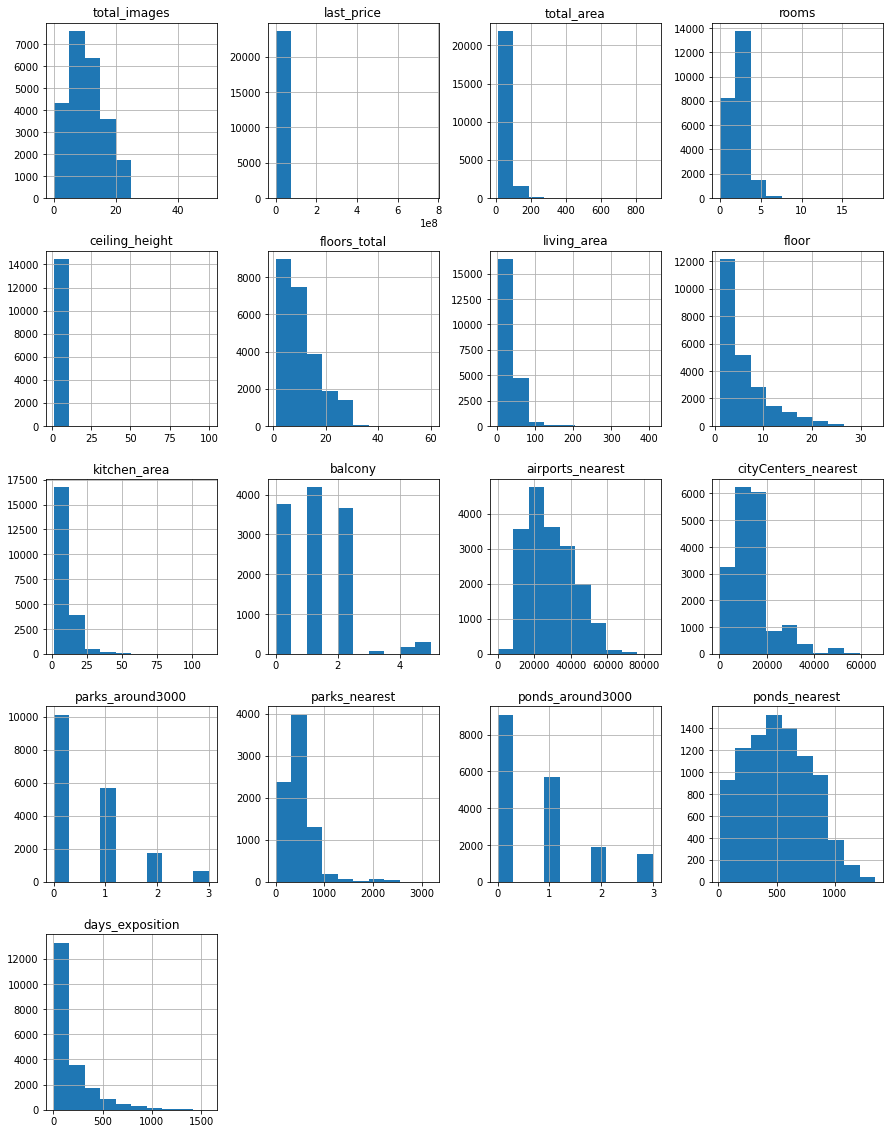

In [6]:
data.hist(figsize=(15, 20)) #строим гистограммы для всех числовых столбцов таблицы

In [7]:
#оценим количество строк и столбцов изначального датафрейма
data.shape

(23699, 22)

### Предобработка данных

2.1 Удаление пропусков

In [8]:
data.isna().sum() #выводим количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как и было утверждено выше - очень большое количество пропущенных значений. 

In [9]:
#заполняем пропуски в колонке "высота потолков" средним значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())

In [10]:
#заполняем пропуски в колонке "апартаменты",исправляя на нужный тип данных: вместо "object" - тип "bool"
data['is_apartment'] = data['is_apartment'].astype('bool').fillna(False) 

In [11]:
#заполняем пропуски в количестве балконов учитывая, что пропуск в данных - это отсутствие балкона. 
data['balcony'] = data['balcony'].fillna(0)

In [12]:
#Посмотрим на характер пропусков в столбце "days_exposition"
data.loc[data['days_exposition'].isna()].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.700000,16.0,51.00,8,True,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.771499,24.0,NaN,22,True,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.771499,22.0,NaN,3,True,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.650000,9.0,30.30,7,True,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.600000,24.0,29.70,9,True,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.500000,9.0,18.00,7,True,...,6.00,0.0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.000000,2.0,94.00,2,True,...,11.00,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.50,2019-03-27T00:00:00,3,2.500000,9.0,39.00,8,True,...,6.20,0.0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,2.771499,10.0,NaN,6,True,...,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.90,2019-03-13T00:00:00,2,2.771499,2.0,27.46,1,True,...,5.20,0.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Смотря на таблицу пропущенных значений по столбцу "количество дней размещения объявления" можно сделать вывод, что большинство пропущенных значений относится к 2017,2018 и наибольшее количество - 2019 годам. Можно сделать предположение, начиная с 2017 года статистика по этим данным велась в необязательном порядке, поэтому мы имеем такое большое количество пропусков. Учитывая такую гипотезу, мы не можем назвать пропуски случайными, потому заполнять их средними или медианными значениями будет неправильно. Оставим пропуски в столбце как есть

In [13]:
#проверим пропуски, которые мы заполнили
print(data.isna().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


В колонке "общее количество этажей" вероятнее всего, пропуски возникли, при внесении данных или неполном их заполнении.
Т.к. общее количество этажей это не самая важная и необходимая информация, владельцы недвижимости могли просто пропустить
этот вопрос.Тем не менее, этот столбец важен для дальнейшего исследования. Заполним пропуски значением 0

In [14]:
data['floors_total'] = data['floors_total'].fillna(0)

In [15]:
#посмотрим, есть ли что-то общее в оставшихся пропусках
data[data['cityCenters_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.771499,12.0,14.40,5,True,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.771499,27.0,15.43,26,True,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.771499,5.0,30.00,5,True,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.750000,25.0,30.00,15,True,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.771499,9.0,NaN,2,True,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.500000,5.0,45.50,3,True,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.771499,5.0,17.50,4,True,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.771499,5.0,38.00,4,True,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.771499,3.0,29.70,1,True,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видим, очень много строк в базе данных, где нет абсолютно никакой информации по картографическим данным. Исходя из этого, перед анализом данных лучше всего отправить запрос, в котором необходимо уточнить информацию - по какой причине отсутствует достаточно большое количество картографических данных. Ошибка ли это при переносе в базу данных, либо их не было изначально, и по какой причине. 
Заполнение этих данных на данном этапе самостоятельно может значительно повлиять на итоговую достоверность. Поэтому заполнять пока не будем

In [16]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.771499,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.771499,24.0,NaN,22,True,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.771499,9.0,NaN,2,True,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.500000,5.0,NaN,1,True,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.771499,22.0,NaN,3,True,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.700000,12.0,NaN,5,True,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.550000,10.0,NaN,1,True,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.800000,9.0,NaN,2,True,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.771499,9.0,NaN,4,True,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Для столбцов "living_area", "kitchen_area" так же нет какой-либо системности. Можно предположить, что некоторые из квартир являются студиями (где общее пространство для жилой площади и кухни). Тем не менее, попробуем заполнить пропуски отношением общей площади к соотношению медианной общей плошади к медианной жилой

In [17]:
#находим значение медианной общей площади
median_total_area = data['total_area'].median()

In [18]:
#находим значение медианной жилой площади
median_living_area = data['living_area'].median()

In [19]:
#находим соотношение медианной общей площади к медианной жилой
ratio_living_area = median_total_area / median_living_area

In [20]:
#заполняем пропущенные значения в столбце "living_area"
data['living_area'] = data['living_area'].fillna(data['total_area'] / ratio_living_area)

Аналогично поступим и с заполнением пропусков в столбце "kitchen_area"

In [21]:
#находим значение медианной площади кухни
median_kitchen_area = data['kitchen_area'].median()

In [22]:
#находим соотношение медианной общей площади к медианной площади кухни
ratio_kitchen_area = median_total_area / median_kitchen_area

In [23]:
#заполняем пропущенные значения в столбце "kitchen_area"
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / ratio_kitchen_area)

In [24]:
#проверим, всё ли заполнено, что было иправлено
print(data.isna().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Работа с пропусками закончена. Можно приступать ко второй части предобработки данных

2.2 Изменение типов данных

Как уже уточнялось выше, в наших данных есть колонки, в которых нужно подобрать более оптимальный тип данных.

In [25]:
#выводим общую информацию
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [26]:
#изменим тип данных в колонке "last_price" на int для удобства
data['last_price'] = data['last_price'].astype('int')

In [27]:
#изменим тип данных в колонке "first_day_exposition" в понятный для Python формат даты. Т.к. нигде не указаго время, уберем "часы-минуты-секунды"
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [28]:
#изменим тип данных в колонке "balcony" с float на int, т.к. количество балконов не может быть не целым числом
data['balcony'] = data['balcony'].astype('int')

In [29]:
#изменим тип данных в колонке "days_exposition" на int, т.к. количество дней не может быть не целым числом
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [30]:
#изменим тип данных в колонке "parks_around3000" с float на int для удобства
data['parks_around3000'] = data['parks_around3000'].convert_dtypes()

In [31]:
#изменим тип данных в колонке "ponds_around3000" с float на int для удобства
data['ponds_around3000'] = data['ponds_around3000'].convert_dtypes()

In [32]:
#проверяем, изменился ли тип данных в переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [33]:
#визуально оценим изменения в массиве данных
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.700000,16.0,51.000000,8,True,...,25.000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000,40.40,2018-12-04,1,2.771499,11.0,18.600000,1,True,...,11.000,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.771499,5.0,34.300000,4,True,...,8.300,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.771499,14.0,91.730769,9,True,...,27.825,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.030000,14.0,32.000000,13,True,...,41.000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.771499,12.0,14.400000,5,True,...,9.100,0,городской посёлок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.771499,26.0,10.600000,6,True,...,14.400,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.771499,24.0,41.307692,22,True,...,18.900,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000,33.16,2018-05-23,1,2.771499,27.0,15.430000,26,True,...,8.810,0,посёлок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.500000,9.0,43.600000,7,True,...,6.500,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


Наши данные стали более читаемые и структурированные. Изменение типа данных необходимо производить в предобработке данных, т.к. в дальнейшем из-за неверного типа данных при расчетах могут возникнуть ошибки или неверные результаты.

2.3 Обработка аномальных значений и дубликатов

In [34]:
#Поиск строк-дубликатов
data.duplicated().sum()

0

Строк-дубликатов нет. В противном случае, было бы необходимо их удалить.

In [35]:
#узнаем, сколько уникальных названий находится в столбце 'locality_name'
data['locality_name'].nunique()

364

In [36]:
#просматриваем уникальные значения столбца "locality_name"
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [37]:
#заменим наибольшее количество строк-дубликатов. в которых нужно заменить слово "посёлок" на "поселок"
data['locality_name'] = data['locality_name'].str.replace('ё','е')

In [38]:
#заменяем оставшиеся повторяющиеся значения
data['locality_name'] = data['locality_name'].replace('поселок Рябово', 'поселок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'посёлок Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
data['locality_name'] = data['locality_name'].replace('поселок Коммунары', 'Коммунар')
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'городской поселок Фёдоровское')
data['locality_name'] = data['locality_name'].replace('городской поселок Советский', 'городской поселок Советский')
data['locality_name'] = data['locality_name'].replace('городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace('городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace('поселок Зимитицы', 'деревня Зимитицы')
data['locality_name'] = data['locality_name'].replace('коттеджный поселок Лесное', 'поселок Лесное')
data['locality_name'] = data['locality_name'].replace('городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace('городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
data['locality_name'] = data['locality_name'].replace('городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')

In [39]:
#проверим, изменилось ли количество уникальных значений в столбце 'locality_name'
data['locality_name'].nunique()

318

Количество значений уменьшилось, а это значит работа с неявными дубликатами завершена

In [40]:
#исправим название колонкок "cityCenters_nearest", "parks_around3000" и "ponds_around3000" согласно правилам Python
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'}, inplace = True)    

In [41]:
data.head() #проверим, исправились ли названия колонок

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.700000,16.0,51.000000,8,True,...,25.000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000,40.4,2018-12-04,1,2.771499,11.0,18.600000,1,True,...,11.000,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.771499,5.0,34.300000,4,True,...,8.300,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.771499,14.0,91.730769,9,True,...,27.825,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.030000,14.0,32.000000,13,True,...,41.000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


In [42]:
#заменим тип данных в столбце "floors_total" на int
data['floors_total'] = data['floors_total'].astype('int')

Название колонок теперь прекрасно подходит под стилистику Python

In [43]:
#посмотрим, есть ли редкие или выбивающиеся значения в столбце "ceiling_height"
data['ceiling_height'].unique()

array([  2.7      ,   2.7714989,   3.03     ,   2.5      ,   2.67     ,
         2.56     ,   3.05     ,   2.75     ,   2.6      ,   2.9      ,
         2.8      ,   2.55     ,   3.       ,   2.65     ,   3.2      ,
         2.61     ,   3.25     ,   3.45     ,   2.77     ,   2.85     ,
         2.64     ,   2.57     ,   4.15     ,   3.5      ,   3.3      ,
         2.71     ,   4.       ,   2.47     ,   2.73     ,   2.84     ,
         3.1      ,   2.34     ,   3.4      ,   3.06     ,   2.72     ,
         2.54     ,   2.51     ,   2.78     ,   2.76     ,  25.       ,
         2.58     ,   3.7      ,   2.52     ,   5.2      ,   2.87     ,
         2.66     ,   2.59     ,   2.       ,   2.45     ,   3.6      ,
         2.92     ,   3.11     ,   3.13     ,   3.8      ,   3.15     ,
         3.55     ,   3.16     ,   3.62     ,   3.12     ,   2.53     ,
         2.74     ,   2.96     ,   2.46     ,   5.3      ,   5.       ,
         2.79     ,   2.95     ,   4.06     ,   2.94     ,   3.8

Судя по информации на сайте https://www.dp.ru/a/2016/10/27/Dostich_potolka, "в последние годы на рынке появились проекты с потолками высотой от 4 до 10 м". Поэтому такие значения высоты потолков: 32, 22.6, 24, 26, 27, 27.5, 20, 100, 25 - могут быть занесены ошибочно в виде целых, а не вещественных значений. Исправим эти значения.
Так же, оставим для каждой высоты потолков 2 значения после запятой. таким образом значение "2.7714989" будет изменего на более лаконичное.
Значения 14 и 10.3 оставим как есть

In [44]:
#обработаем аномалии
data = data.replace({'ceiling_height' : {32. : 3.2, 22.6 : 2.26, 24. : 2.4, 26. : 2.6, 27. : 2.7, 27.5 : 2.75, 20. : 2.0, 100. : 10.0, 25. : 2.5}})

In [45]:
#приведем все значения к одинаковому виду
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: '{:.2f}'.format(x)).astype('float64')

In [46]:
#убедимся, что данные в порядке
data['ceiling_height'].unique()

array([ 2.7 ,  2.77,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

аномальные значения столбца "ceiling_height" исправлены. Но есть сомнения насчет объектов недвижимости, в которых высота потолков до 2 метров и высота 14 метров. Изучим данные

In [47]:
#изучим данные строк, с выбивающимися значениями по высоте потолков
data[data['ceiling_height'].isin([1.00, 1.20, 1.75, 14.00])] 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5712,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,True,...,5.20,0,поселок городского типа Мга,NaN,NaN,<NA>,NaN,<NA>,NaN,248
15061,19,5600000,56.4,2018-05-11,2,14.00,14,32.4,5,True,...,9.10,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315
16934,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,True,...,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71
22590,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,True,...,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13


Мы имеем 4 объекта недвижимости со значениями, не похожими на средние. Довольно проблематично принять факт, что в Санкт-Петербурге продается недвижимость с высотой потолка 1.75 и 1 метр. Высота в 14 метров теоретически может существовать как некое дизайнерское решение. Эти данные вполне похожи на аномалии, но причину их возникновения понять пока невозможно.
Поэтому для нашего исследования лучше изъять данные с такими показателями, взяв за основу высоту потолков от 2 до 10,5 метров

In [48]:
#исключим из датафрейма данные с неподходящими значениями
data = data.query('ceiling_height not in [1.00, 1.20, 1.75, 14.00]')

In [49]:
#проверим, удалены ли данные
data['ceiling_height'].unique()

array([ 2.7 ,  2.77,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        8.3 ,  2.98,

In [50]:
#посмотрим на значения в стобце "total_images"
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

В данном столбце отсутствуют пропущенные значения. Вопросы вызывают объекты недвижимости, у которых малое количество фото. В целом при продаже чем больше фото - тем более информативней объявление. Удалять такие строки не будем. Возможно, объявление с небольшим количеством фото ориентрованы на оффлайн продажу (непосредственный показ объекта). Будем иметь это ввиду

In [51]:
#посмотрим на значения в стобце "rooms"
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Есть интересные значения , такие как 16, 19-комнатные объекты недвижимости. Оценить на данный момент - аномальное ли это значение пока невозможно. В дальнейшем при постройке графиков можно будет говорить более основательно - действительно ли это выброс или, возможно, это продажа недвижимости бывшей раннее комуннальной квартирой либо нежилое помещение под склад и т.д.

In [52]:
#Посмотрим, какое количество строк и столбцов осталось после предобработки данных
data.shape

(23695, 22)

В начале исследование у нас было 23699 строк и 22 колонки. После предобработки осталось 23695 строк и 22 колонки. Доля данных, которые остались составила 0,99 или 99%. Это хороший показатель, т .к. мы смогли сохранить практически все имеющиеся данные

В целом предобработка данных завершена. Пока еще нет возможности достоверно определить, почему были произведены те или иные пропуски. Что касается пропусков в картографических данных - для исследования было бы гораздо лучше обратиться за помощью к сотрудникам, которые готовили эти данные, чтобы уточнить: по какой причине в этих столбцах так много пропусков. Было ли это повреждением данных при объединении базы данных, либо данных изначально было в малом количестве. Т.к. все возможные пропущенные значения были заполнены, дальнейшее исследование будет проходить с поправкой на незаполненнные пропуски в оставшихся столбцах данных

### Посчитайте и добавьте в таблицу новые столбцы

In [53]:
#создадим и добавим новый столбец с ценой квадратного метра
data['price_meter'] = (data['last_price'] / data['total_area']).astype('int')

In [54]:
#создадим и добавим новый столбец с указанием дня публикации
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

In [55]:
#создадим и добавим новый столбец с указанием месяца публикации
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [56]:
#создадим и добавим новый столбец с указанием года публикации
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [57]:
#отсортируем типы этажей квартиры с помощью функции
def floor_type(floors_total, floor):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [58]:
#добавим новый столбец с типом этажа в датафрейм
data['floors_type'] = data.apply(lambda row: floor_type(row['floors_total'], row['floor']), axis=1)

In [59]:
#добавим столбец расстояния до центра города в километрах и округлим до целых значений
data['city_center_km'] = data['city_centers_nearest']/1000
data['city_center_km'] = round(data['city_center_km'])

In [60]:
#проверим все изменения
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_meter,day_publication,month_publication,year_publication,floors_type,city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,True,...,482.0,2,755.0,<NA>,120370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.77,11,18.600000,1,True,...,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.77,5,34.300000,4,True,...,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.77,14,91.730769,9,True,...,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,True,...,112.0,1,48.0,121,100000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.77,12,14.400000,5,True,...,NaN,<NA>,NaN,55,95065,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.77,26,10.600000,6,True,...,NaN,0,NaN,155,99195,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.77,24,41.307692,22,True,...,NaN,0,NaN,<NA>,110544,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.77,27,15.430000,26,True,...,NaN,<NA>,NaN,189,87454,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,True,...,NaN,0,NaN,289,88524,6,2,2017,другой,15.0


В этой части исследования были добавлены новые столбцы. Эти данные понадобятся непосредственно в уже последующей части нашего проекта

### Проведём исследовательский анализ данных

4.1 Изучим следующие параметры объектов

<AxesSubplot:ylabel='Frequency'>

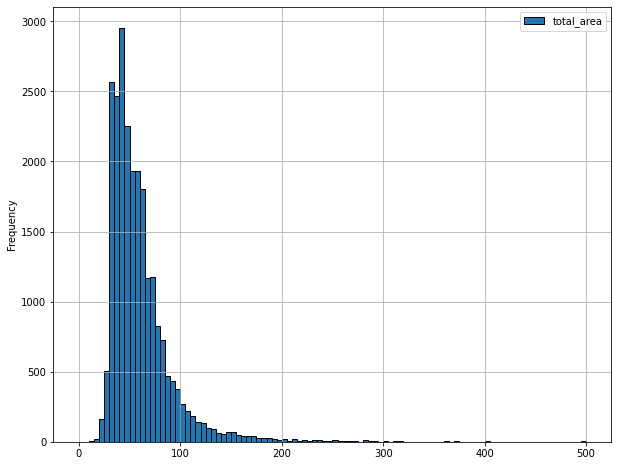

In [61]:
#построим гистограмму для столбца "total_area"
data.plot(y='total_area', grid=True, kind='hist', figsize=(10, 8), bins=100, range=(0, 500), edgecolor='black')

<AxesSubplot:>

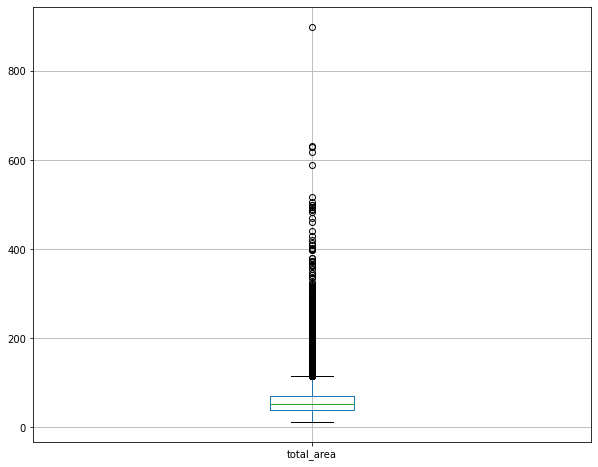

In [62]:
#построим диаграмму размаха для "total_area"
data.boxplot(column = 'total_area',figsize=(10, 8) )

In [63]:
#вызовем список характерных значений "total_area"
data['total_area'].describe()

count    23695.000000
mean        60.350643
std         35.656639
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Что касается параметра "Общая площадь": распределение данных несёт нормальный характер. Есть выбросы в виде достаточно больших значений (максимальная общая площадь объекта недвижимости - 900 кв.м.), однако это не сильно влияет на общую картину данных. Среднее значение общей площади равно 60 кв.м, а медиана равна 52 кв.м. Наибольшее количество продаваемых квартир с площадью около 46 кв.м. В среднем наибольшее количество продаваемых объектов недвижимости до 100 кв.м. Квартир более 100 кв.м. гораздо меньше и их количество идёт на спад. В целом приобрести недвижимость возможно на любой вкус: начиная от 12 кв.м до 900 кв.м.      

In [64]:
#посмотрим на данные ближе, устранив выбросы
data_total = data.query('total_area < 100')

<AxesSubplot:ylabel='Frequency'>

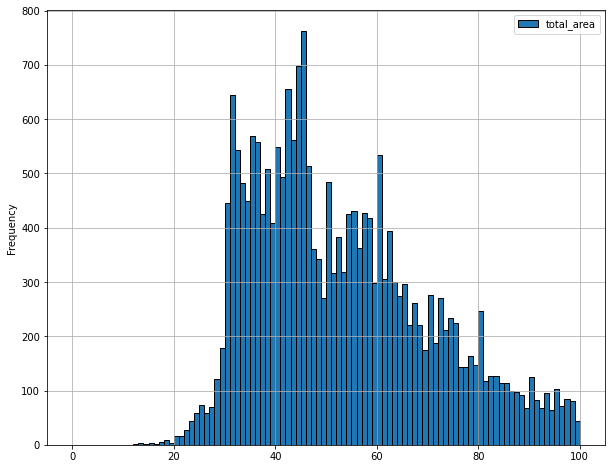

In [65]:
#снова построим гистограмму 
data_total.plot(y='total_area', grid=True, kind='hist', figsize=(10, 8), bins=100, range=(0, 100), edgecolor='black')

Картина подтвержадется графиком выше. Можно добавить, что количество квартир с общей площадью до 30 кв.м. достаточно мало. В среднем, на рынке недвижимости продается большее количество квартир с площадью 30-60 кв.м.

<AxesSubplot:ylabel='Frequency'>

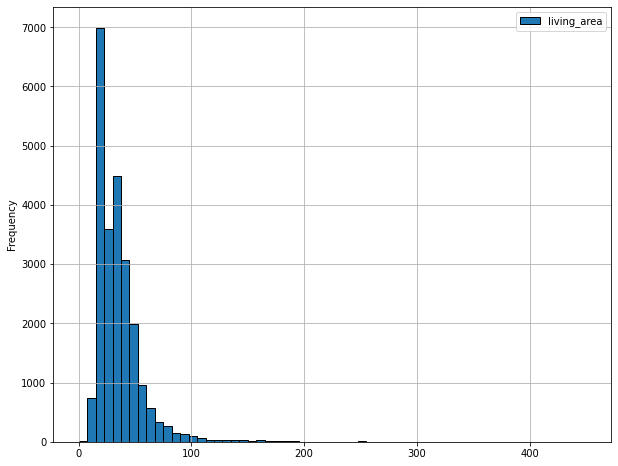

In [66]:
#построим гистограмму для столбца "living_area"
data.plot(y='living_area', grid=True, kind='hist', figsize=(10, 8), bins=60, range=(0, 450), edgecolor='black')

<AxesSubplot:>

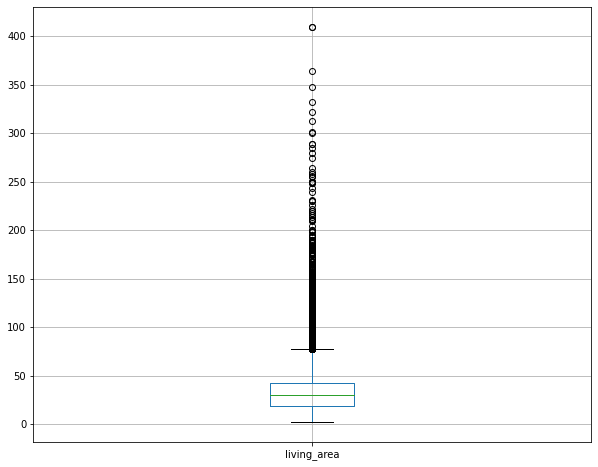

In [67]:
#построим диаграмму размаха для "living_area"
data.boxplot(column = 'living_area',figsize=(10, 8) )

In [68]:
#вызовем список характерных значений "living_area"
data['living_area'].describe()

count    23695.000000
mean        34.625511
std         22.383425
min          2.000000
25%         19.000000
50%         30.000000
75%         42.186538
max        409.700000
Name: living_area, dtype: float64

Среднее значение жилой площади состаляет 34 кв.м, медианное значение - 30 кв.м. Минимальное значение жилой площади составляет 2 кв.м. Это может быть указанное конкретно жилое пространство в квартирах-студиях, но возможно и значение, которое было внесено ошибочно (указали 2 вместо 20, например). Присутствует большое количество выбросов. Оценим значения, устранив выбросы.

In [69]:
#посмотрим на данные, устранив выбросы
data_living = data.query('living_area < 70')

<AxesSubplot:ylabel='Frequency'>

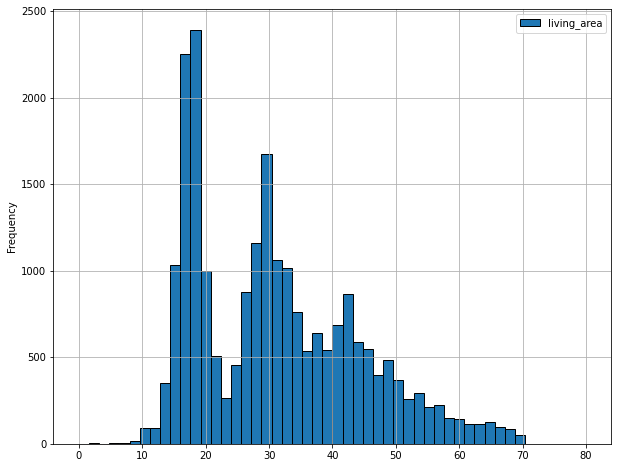

In [70]:
#построим гистограмму 
data_living.plot(y='living_area', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 80), edgecolor='black')

Как мы видим, наибольшее количество предложений продажи с жилой площадью около 16-18 кв.м.Это может быть связано с продажей большого количества однокомнатных квартир или студий. 

<AxesSubplot:ylabel='Frequency'>

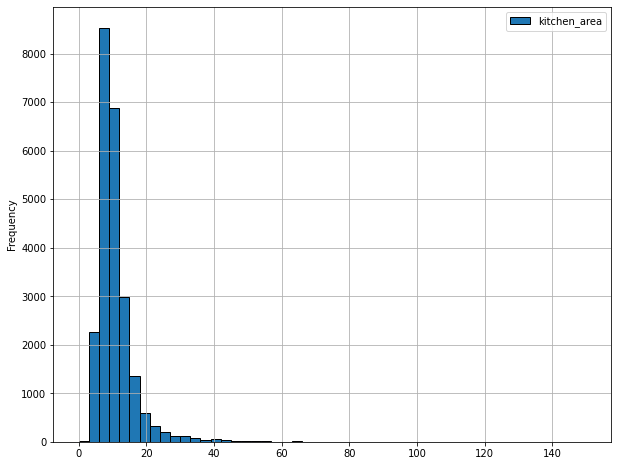

In [71]:
#построим гистограмму для столбца "kitchen_area"
data.plot(y='kitchen_area', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 150), edgecolor='black')

<AxesSubplot:>

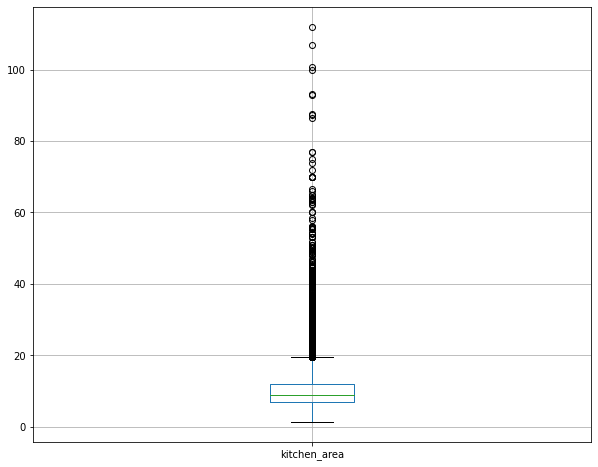

In [72]:
#построим диаграмму размаха для "kitchen_area"
data.boxplot(column = 'kitchen_area',figsize=(10, 8) )

In [73]:
#вызовем список характерных значений "kitchen_area"
data['kitchen_area'].describe()

count    23695.000000
mean        10.505891
std          6.039788
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Среднее значение площади кухни составляет 10,5 кв.м, медиана - 9 кв.м. Минимальная площадь составляет 1.3 кв.м, в то время как максимальная - 112 кв.м. Посмотрим на значения без учета выбросов

In [74]:
#посмотрим на данные ближе, устранив выбросы
data_kitchen = data.query('kitchen_area < 20')

<AxesSubplot:ylabel='Frequency'>

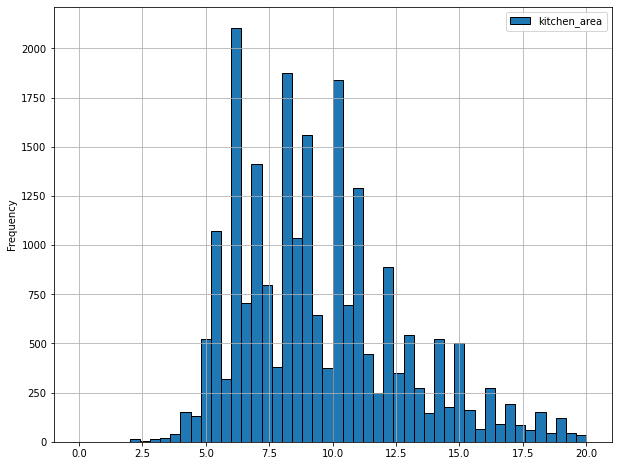

In [75]:
#построим гистограмму 
data_kitchen.plot(y='kitchen_area', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 20), edgecolor='black')

Наибольшее количество преложений на рынке недвижимости у квартир с площадью кухни около 6 кв.м. Возможно, данные по площади кухни отчасти подтверждают гипотезу, что на рынке недвижимости очень большое предложение на однокомнатные квартиры. Проверим это построив дальше гистограмму по параметру "количество комнат"

<BarContainer object of 17 artists>

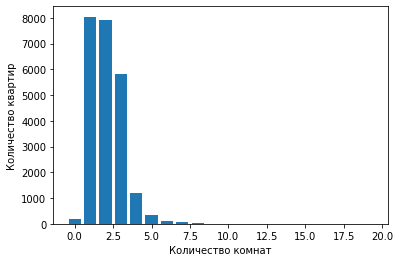

In [76]:
#построим график для столбца "rooms"
rooms_types = data['rooms'].value_counts()
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.bar(x=rooms_types.index, height=rooms_types.values)

Из графика видим, что наибольшее количество предложений это 1-комнатные и 2-комнатные с относительно небольшим отрывом. Исходя из этого можем отчасти подтвердить гипотезу о том, что наиболее часто встречающиеся небольшие площади жилой и кухонной зон небольшие именно из-за того, что больше всего продается однокомнатных квартир. так же это может быть связано с продажей небольших двухкомнатных квартир, в которых хозяева могли объединить одну из комнат с кухней (на данный момент при анализе продающейся недвижимости очень часто можно встретить 2-комнатную квартиру, в которой кухня объеденена с одной из комнат). Данные в которых количество комнат равно 0, можно отнести к продаже квартир-студий. 

<AxesSubplot:ylabel='Frequency'>

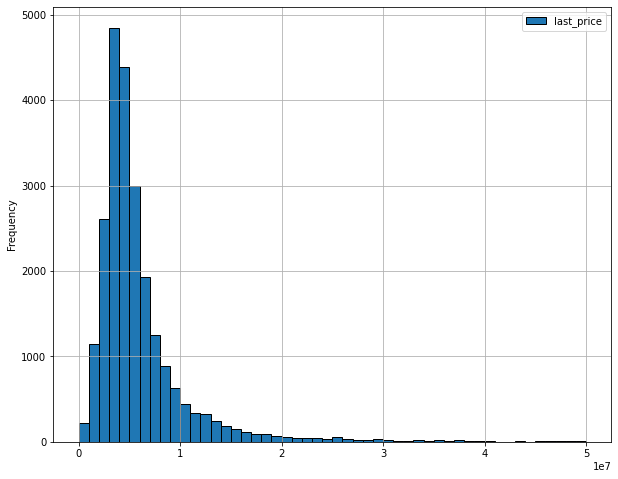

In [77]:
#построим гистограмму для столбца "last_price"
data.plot(y='last_price', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 50000000), edgecolor='black')

<AxesSubplot:>

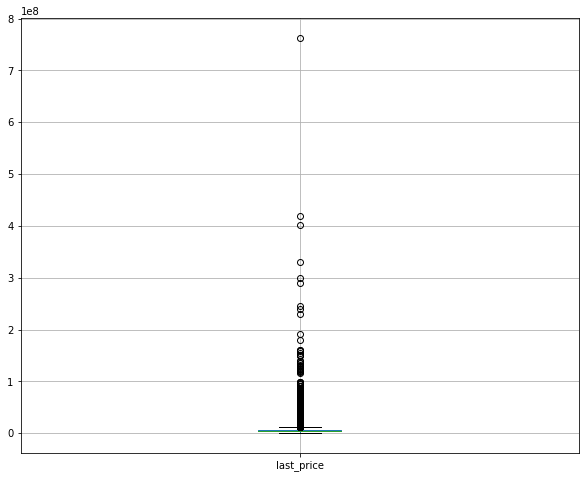

In [78]:
#построим диаграмму размаха для "last_price"
data.boxplot(column = 'last_price',figsize=(10, 8) )

In [79]:
#вызовем список характерных значений "last_price"
data['last_price'].describe()

count    2.369500e+04
mean     6.541927e+06
std      1.088787e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данных о стоимости квартир достаточно большое количество выбросов.Средняя стоимость недвижимости составляет 6.5 млн., медианное значение равно 4.6 млн. Приобрести квартиру можно минимум за 1.2 млн, максимум - около 7.6 млн. Сократим количество выбросов, и посмотрим, как изменится среднее и медианное значение

In [80]:
#посмотрим на данные ближе, устранив выбросы
data_price = data.query('last_price < 10000000')

<AxesSubplot:ylabel='Frequency'>

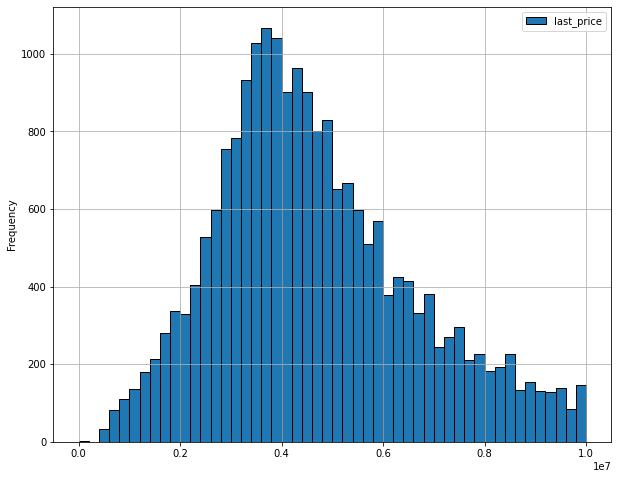

In [81]:
#построим гистограмму 
data_price.plot(y='last_price', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 10000000), edgecolor='black')

In [82]:
#вызовем список характерных значений 
data_price['last_price'].describe()

count    2.091300e+04
mean     4.633494e+06
std      1.948379e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.300000e+06
75%      5.800000e+06
max      9.999999e+06
Name: last_price, dtype: float64

Медианное значение стоимости квартир осталось практически аналогичным, снизившись до 4.3 млн. В среднем, на рынке недвижимости больше всего предложений покупки квартир по стоимости около 3.8 млн. Учитывая, что наибольшее предложение на рынке это однокомнатные квартиры - такая сумма вполне подтверждает данную гипотезу

<AxesSubplot:ylabel='Frequency'>

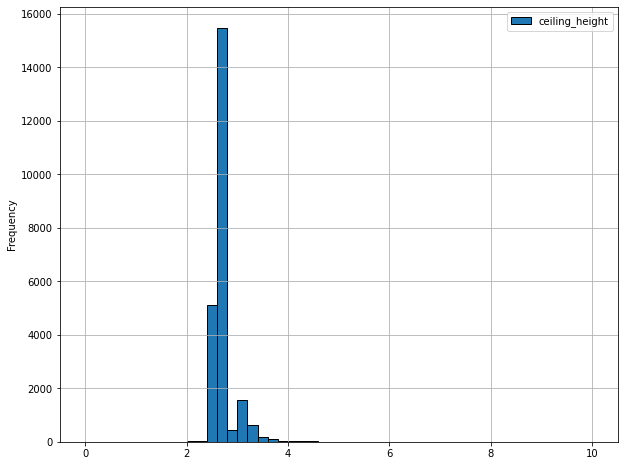

In [83]:
#построим гистограмму для столбца "ceiling_height"
data.plot(y='ceiling_height', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 10), edgecolor='black')

In [84]:
#вызовем список характерных значений "ceiling_height"
data['ceiling_height'].describe()

count    23695.000000
mean         2.744985
std          0.239562
min          2.000000
25%          2.600000
50%          2.770000
75%          2.770000
max         10.300000
Name: ceiling_height, dtype: float64

Анализируя данные видим, что в среднее значение высоты потолка составляет 2.7 м. 

<AxesSubplot:ylabel='Frequency'>

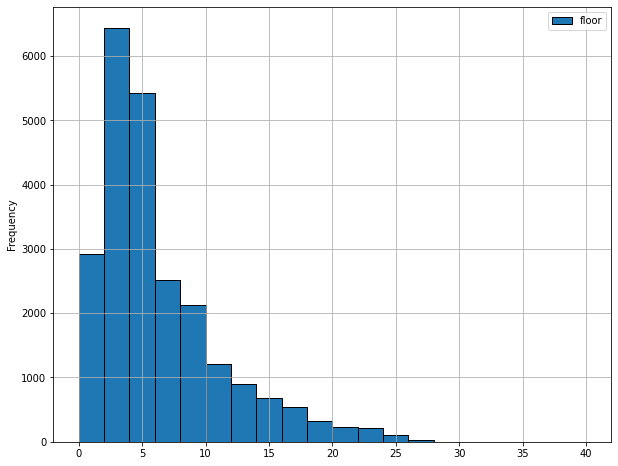

In [85]:
#построим гистограмму для столбца "floor"
data.plot(y='floor', grid=True, kind='hist', figsize=(10, 8), bins=20, range=(0, 40), edgecolor='black')

In [86]:
#вызовем список характерных значений "floor"
data['floor'].describe()

count    23695.000000
mean         5.892593
std          4.885546
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Исходя из графика можно сделать вывод: наиболее частые продажи квартир на 4 этаже

<BarContainer object of 3 artists>

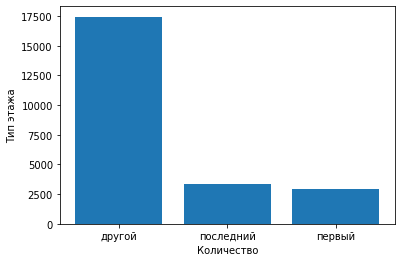

In [87]:
#построим график для столбца "floors_type"
floor_types = data['floors_type'].value_counts()
plt.xlabel('Количество')
plt.ylabel('Тип этажа')
plt.bar(x=floor_types.index, height=floor_types.values)

анализируя данные мы видим, что продаж квартир на первом и последнем этаже практически одинаковые, на первом всё же немного меньше. В большем количестве продаются квартиры на других этажах

<AxesSubplot:ylabel='Frequency'>

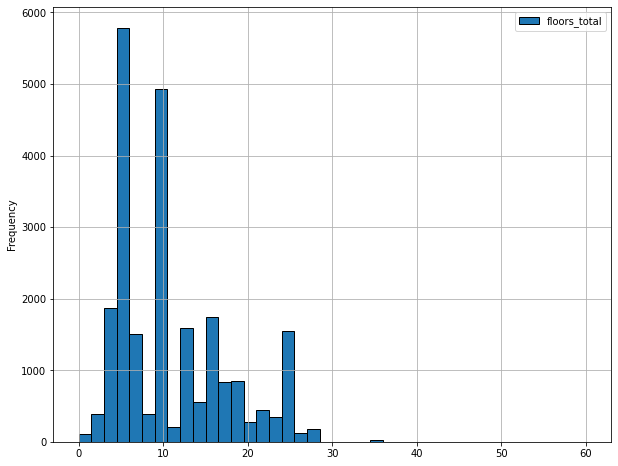

In [88]:
#построим гистограмму для столбца "floors_total"
data.plot(y='floors_total', grid=True, kind='hist', figsize=(10, 8), bins=40, range=(0, 60), edgecolor='black')

In [89]:
#вызовем список характерных значений "floors_total"
data['floors_total'].describe()

count    23695.000000
mean        10.634142
std          6.614458
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Исходя из графика, наиболее часто на рынке недвижимости продают квартиры находящиеся в 5-этажных домах. Квартиры в высотных зданиях продаются на порядок реже

<AxesSubplot:ylabel='Frequency'>

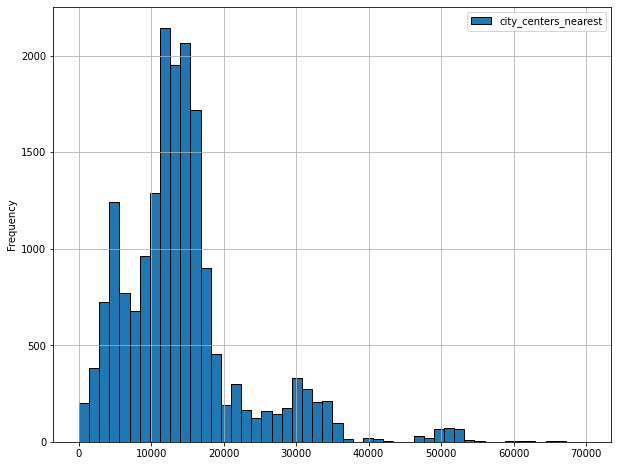

In [90]:
#построим гистограмму для столбца "city_centers_nearest"
data.plot(y='city_centers_nearest', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 70000), edgecolor='black')

In [91]:
#вызовем список характерных значений "city_centers_nearest"
data['city_centers_nearest'].describe()

count    18177.000000
mean     14190.964406
std       8608.970586
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Среднее значение расстояния до центра составляет 14 км, в то время как минимальное - 181 метр, максимальное - почти 66 км. Но так же не будем забывать что в этом столбце, как и последующих, которые мы будем рассматривать находилось достаточно много пропущенных значений

<AxesSubplot:ylabel='Frequency'>

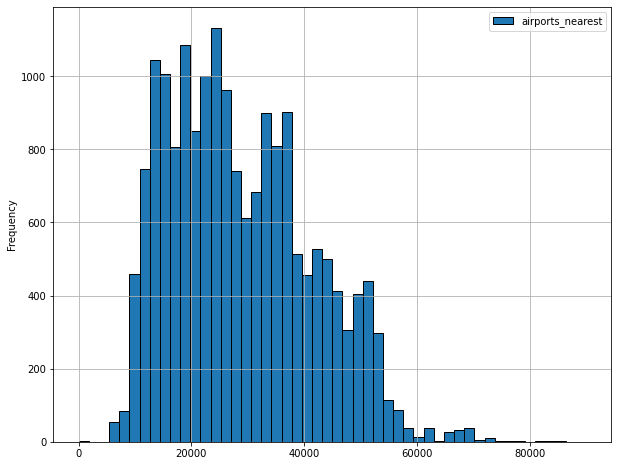

In [92]:
#построим гистограмму для столбца "airports_nearest"
data.plot(y='airports_nearest', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 90000), edgecolor='black')

In [93]:
#вызовем список характерных значений "airports_nearest"
data['airports_nearest'].describe()

count    18154.000000
mean     28794.761871
std      12631.237778
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37274.500000
max      84869.000000
Name: airports_nearest, dtype: float64

Исходя из данных, среднее растояние до аэропорта составляет 28 км. Так же, можно предположить что продается недвижимость в непосредственной близости от аэропорта (значение 0), но так же это может быть и неверно введенными данными. Наибольшее количество квартир на продажу находится на расстоянии около 26 км от ближайшего аэропорта

<AxesSubplot:ylabel='Frequency'>

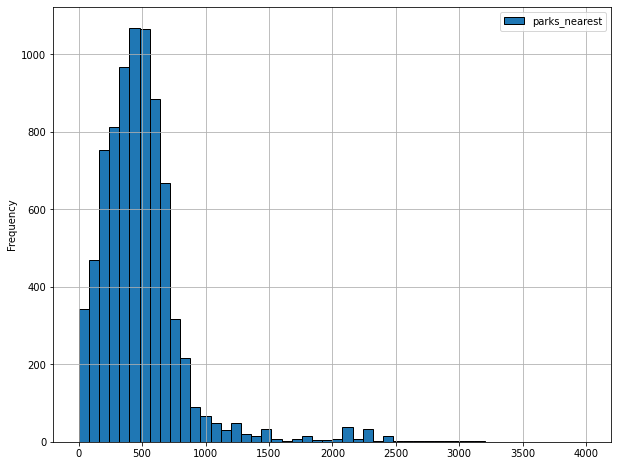

In [94]:
#построим гистограмму для столбца "parks_nearest"
data.plot(y='parks_nearest', grid=True, kind='hist', figsize=(10, 8), bins=50, range=(0, 4000), edgecolor='black')

In [95]:
#вызовем список характерных значений "parks_nearest"
data['parks_nearest'].describe()

count    8078.000000
mean      490.829042
std       342.332109
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В целом, наибольшее количество недвижимости на продажу находится в близости от парка на расстоянии 500 м. Есть недвижимость непосредственно рядом с парком(1 м). максимальная отдаленность от парка составляет 3.2 км 

<BarContainer object of 12 artists>

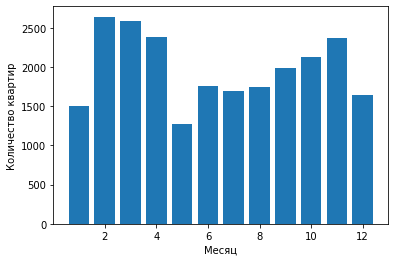

In [96]:
#построим график для столбца "month_publication"
month_types = data['month_publication'].value_counts()
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.bar(x=month_types.index, height=month_types.values)

В целом, график продаж в течении года подтверждает понятие "сезонности". Наибольший пик продаж приходится на февраль месяц, затем наблюдается достаточно плавный спад до апреля(включительно). В мае наименьшее количество покупок. Летом средние значения в целом не меняются и начиная с сентября снова начинается рост продаж до ноября(включительно). Спад в декабре-январе может быть связан с большим количеством праздников, либо с отпусками в более теплых странах на праздничные каникулы. Тоже относится и к продажам летом - в целом это сезон отпусков, но тем не менее, как мы можем наблюдать, количество продаж не самое минимальное

<BarContainer object of 7 artists>

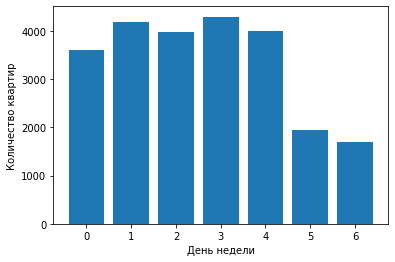

In [97]:
#построим график для столбца "day_publication"
day_types = data['day_publication'].value_counts()
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.bar(x=day_types.index, height=day_types.values)

Судя по графику, наиболее большое количество объявлений появляется в четверг. Самое малое количество выкладываемых объявлений в выходные дни - суббота, воскресенье. Такая разница может быть связана с графиком работы самого риелтора(пятидневный график). Либо возможно, риелторы посещают недвижимость на продажу в выходные дни и в начале недели, и после подготовки и заполнения данных о квартирах (фото, описание) на сайте эти квартиры появляются ближе к четвергу 

4.2 Изучим, как быстро продавались квартиры

<AxesSubplot:ylabel='Frequency'>

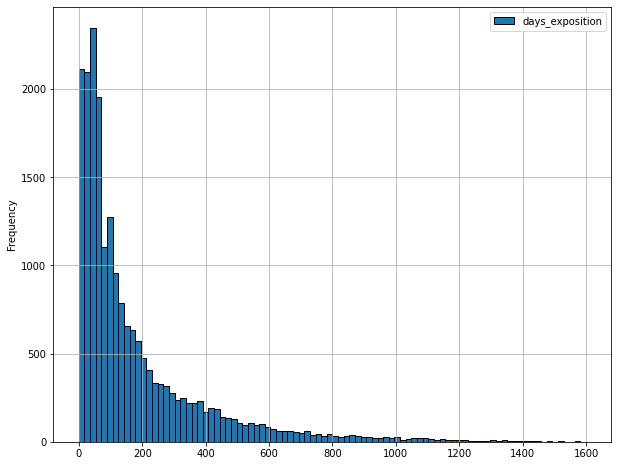

In [98]:
#построим гистограмму для столбца "days_exposition"
data.plot(y='days_exposition', grid=True, kind='hist', figsize=(10, 8), bins=90, range=(0, 1600), edgecolor='black')

In [99]:
#вызовем список характерных значений "days_exposition"
data['days_exposition'].describe()

count    20514.000000
mean       180.892366
std        219.742450
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее количество дней продажи квартиры составляет 169 дней, медианное значение - 95 дней. Наибольшее количество квартир продается в течении 100 дней. Посмотрим на выбросы

<AxesSubplot:>

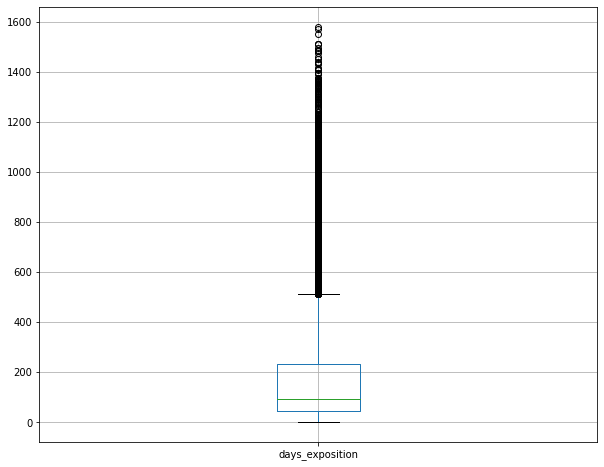

In [100]:
#построим диаграмму размаха для "days_exposition"
data.boxplot(column = 'days_exposition',figsize=(10, 8) )

Имеем достаточно большое количество выбросов. Ограничим срок продажи 450 днями, посмотрим более детально

In [101]:
#посмотрим на данные ближе, устранив выбросы
data_exposition = data.query('days_exposition < 450')

<AxesSubplot:ylabel='Frequency'>

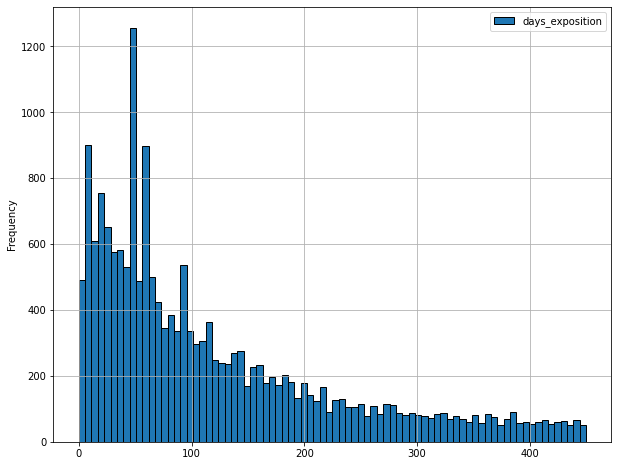

In [102]:
#построим гистограмму
data_exposition.plot(y='days_exposition', grid=True, kind='hist', figsize=(10, 8), bins=80, range=(0, 450), edgecolor='black')

Пик продаж приходится не на 100 дней, а 60. так же есть еще несколько достаточно значимых пиков с 0 до 100. Рассмотрим эти данные более подробно - создадим срез до 100 дней

In [103]:
data_exposition_1 = data.query('days_exposition < 100')

<AxesSubplot:ylabel='Frequency'>

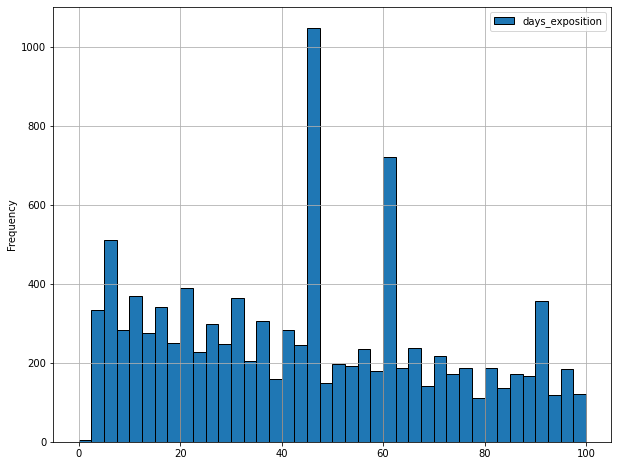

In [104]:
#построим гистограмму
data_exposition_1.plot(y='days_exposition', grid=True, kind='hist', figsize=(10, 8), bins=40, range=(0, 100), edgecolor='black')

In [105]:
#вызовем список характерных значений "days_exposition"
data_exposition_1['days_exposition'].describe()

count    10505.000000
mean        44.707853
std         26.762930
min          1.000000
25%         21.000000
50%         45.000000
75%         63.000000
max         99.000000
Name: days_exposition, dtype: float64

Мы имеем пики продаж на 45, 60 и 90-й день продаж.  На данном этапе исследования было бы неплохо обратиться к сотрудникам, чтобы уточнить насчет дополнительной информации: являются ли выбивающиеся значения 45, 60 и 90 аномальными или их появление имеет другую причину. Для нашего исследования эти данные мы исключим

In [106]:
#создадим новый датафрейм, без аномальных значений в столбце "days_exposition"
data_new = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 90')

<AxesSubplot:ylabel='Frequency'>

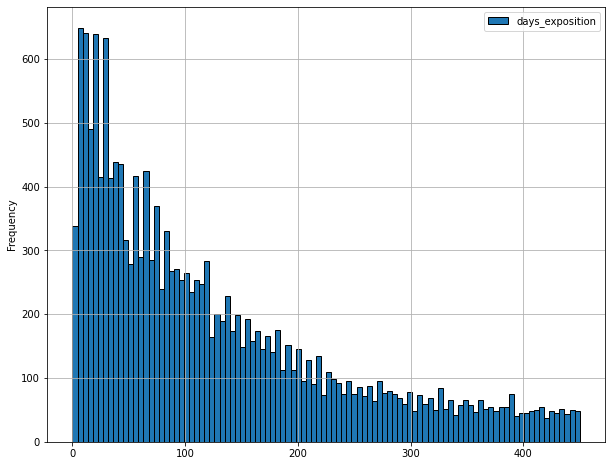

In [111]:
#построим гистограмму
data_new.plot(y='days_exposition', grid=True, kind='hist', figsize=(10, 8), bins=100, range=(0, 450), edgecolor='black')

<AxesSubplot:>

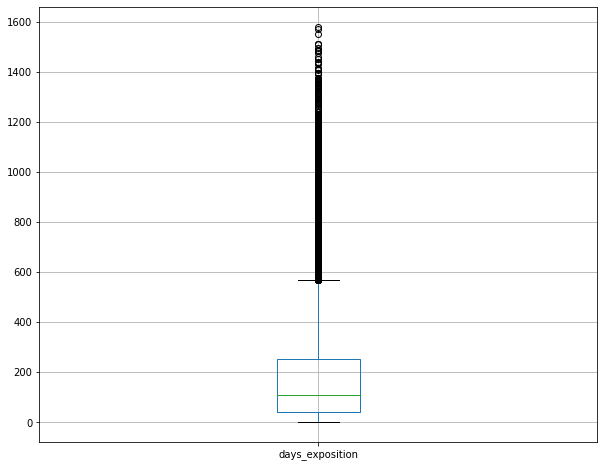

In [112]:
#построим диаграмму размаха для "days_exposition"
data_new.boxplot(column = 'days_exposition',figsize=(10, 8) )

In [113]:
#вызовем список характерных значений "days_exposition"
data_new['days_exposition'].describe()

count    18892.000000
mean       191.646517
std        225.724084
min          1.000000
25%         41.000000
50%        110.000000
75%        252.000000
max       1580.000000
Name: days_exposition, dtype: float64

В результате удаления аномальных значений - 45, 60 и 95 немного увеличилось количество нормальных значений, об этом можно судить по диаграмме размаха. Увеличилось среднее значение с 169 до 191. Медианное значение увеличилось до 110. Выходит, в среднем продажа объекта недвижимости составляет 110 дней - приблизительно 3 месяца, это вполне нормальный временной промежуток для продажи.
Быстрыми продажами можно считать сделки, которые совершаются до 50 дней, а максимально долгими - продажа более 250 дней

4.3 Какие факторы больше всего влияют на общую стоимость объекта недвижимости

In [114]:
#создадим сводную таблицу зависимости цены от общей площади
pivot_total_area = data_total.pivot_table(index = ['total_area'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='total_area'>

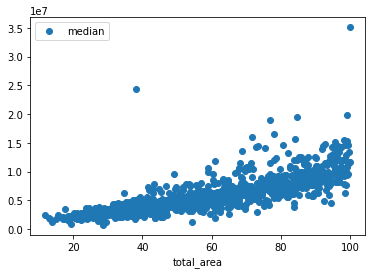

In [115]:
#построим диаграмму рассеивания
pivot_total_area.plot(y = 'median', style='o')

In [116]:
#определим коэфициент корреляции
data_total['total_area'].corr(data_total['last_price'])

0.6496638442201446

Исходя из графика видно, что с увеличением общей площади увеличивается и стоимость квартиры. Коэффициент корреляции составляет - 0.64, что говорит о довольно сильной взаимосвязи этих двух показателей. Есть выбивающиеся значения (при небольшой площади - высокая цена), это может быть связано с дизайнерским ремонтом, или наличием большого количества техники, которая продается вместе с объектом недвижимости

In [117]:
#создадим сводную таблицу зависимости цены от жилой площади
pivot_living_area = data_living.pivot_table(index = ['living_area'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='living_area'>

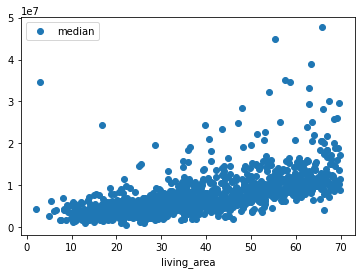

In [118]:
#построим диаграмму рассеивания
pivot_living_area.plot(y = 'median', style='o')

In [119]:
#определим коэфициент корреляции
data_living['living_area'].corr(data_total['last_price'])

0.5110275619716809

В целом зависимость цены от жилой площади так же хорошо прослеживается. Коэффициент корреляции составляет - 0.50, что говорит о достаточно большой взаимосвязи

In [120]:
#создадим сводную таблицу зависимости цены от площади кухни
pivot_kitchen_area = data_kitchen.pivot_table(index = ['kitchen_area'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='kitchen_area'>

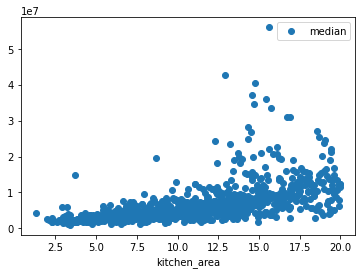

In [121]:
#построим диаграмму рассеивания
pivot_kitchen_area.plot(y = 'median', style='o')

In [122]:
#определим коэфициент корреляции
data_kitchen['kitchen_area'].corr(data_total['last_price'])

0.4877214653967754

Зависимость между ценой недвижимости и площади кухни на порядок ниже, коэффициент корреляции составляет - 0.48, что говорит о небольшой взаимосвязи. Возможно, это связано с тем, что люди при покупке всё таки большее внимание акцентируют на жилой площади

In [123]:
#создадим сводную таблицу зависимости цены от площади кухни
pivot_rooms = data.pivot_table(index = ['rooms'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='rooms'>

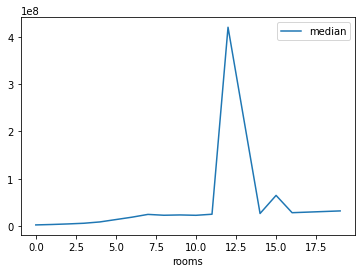

In [124]:
#построим диаграмму рассеивания
pivot_rooms.plot(y = 'median')

Пик при 12 комнатах похож на выброс, посмотрим

<AxesSubplot:>

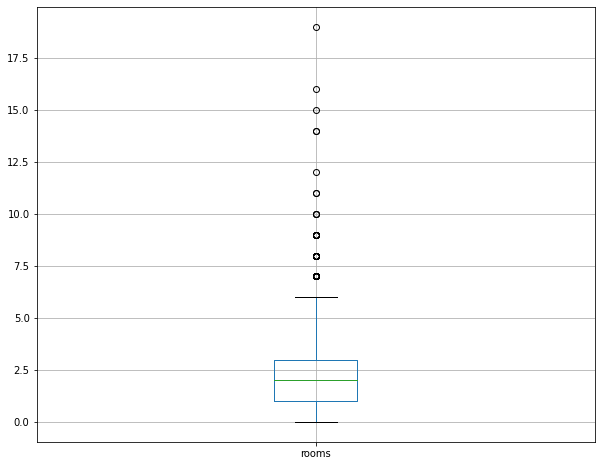

In [125]:
data.boxplot(column = 'rooms',figsize=(10, 8) )

Так и есть, отсечем данные выбросов и повторим всё с самого начала

In [126]:
#устраним выбросы
data_rooms = data.query('rooms < 6')

In [127]:
#создадим сводную таблицу зависимости цены от количества комнат
pivot_rooms = data_rooms.pivot_table(index = ['rooms'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='rooms'>

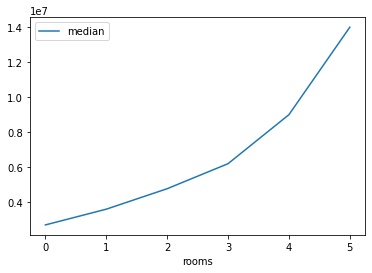

In [128]:
#построим диаграмму рассеивания
pivot_rooms.plot(y = 'median')

In [129]:
#определим коэфициент корреляции
data_rooms['rooms'].corr(data_total['last_price'])

0.3550811396531914

Теперь всё выглядит вполне логично: с увеличением количества комнат растёт и стоимость квартиры

In [130]:
#создадим сводную таблицу зависимости цены от этажа, на котором расположена квартира
pivot_floors_type = data.pivot_table(index = ['floors_type'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='floors_type'>

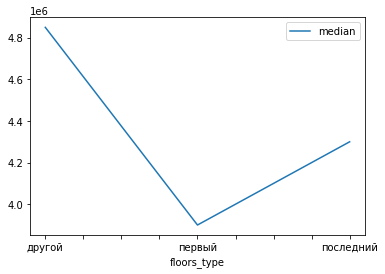

In [131]:
#построим диаграмму рассеивания
pivot_floors_type.plot(y = 'median')

Исходя из данных графика можно предположить, что наименьшая стоимость квартир на первом этаже, больше - на последнем, и на других этажах стоимость гораздо больше 

In [132]:
#создадим сводную таблицу зависимости цены от дня размещения объявления
pivot_day_publication = data.pivot_table(index = ['day_publication'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='day_publication'>

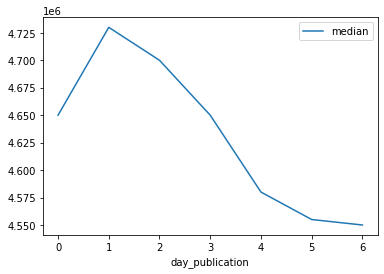

In [133]:
#построим диаграмму рассеивания
pivot_day_publication.plot(y = 'median')

На графике видно - что цена незначительно повышается у квартир, которые были выставлены на продажу во вторник. По воскресеньям стоимость самая низкая. Это довольно интересная зависимость. Возможно, это может быть связано с тем, что риэлторы вначале недели подготавливают новые варинты для продаж, и во вторник выставляется первоначальная цена, которая с последующими днями регулируется по отношению к спросу на рынке недвижимости

In [134]:
#создадим сводную таблицу зависимости цены от месяца размещения объявления
pivot_month_publication = data.pivot_table(index = ['month_publication'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='month_publication'>

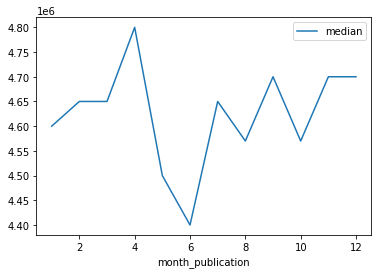

In [135]:
#построим диаграмму рассеивания
pivot_month_publication.plot(y = 'median')

Наибольшая стоимость квартир в апреле месяце. А наименьшая в июне. Данный график вполне подтверждает нашу диаграмму выше - о сезонности рынка недвижимости по месяцам. А именно: постепенный рост стоимости недвижимости с февраля по апрель, затем спад вначале лета (сезон отпусков и соответсвенно, сниженный спрос) и затем небольшие колебания осенью 

In [136]:
#создадим сводную таблицу зависимости цены от года размещения объявления
pivot_year_publication = data.pivot_table(index = ['year_publication'], values = 'last_price', aggfunc ={'median', 'count', 'mean'})

<AxesSubplot:xlabel='year_publication'>

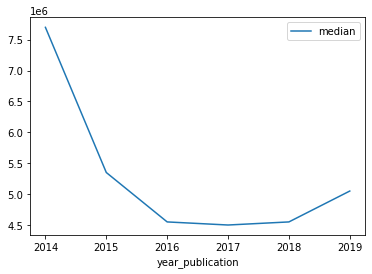

In [137]:
#построим диаграмму рассеивания
pivot_year_publication.plot(y = 'median')

Здесь мы видим, как стоимость квартир уменьшалась с 2014 года. Наибольший крутой спад произошел в 2014-2015 годах. Затем начиная с 2018 года стоимость квартир начала постепенно расти. Такой спад может быть связан с имеющимся на тот момент (2014 год) экономическим кризисом и ощутимым спадом доллара

4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [138]:
#создадим сводную таблицу зависимости стоимости квадратного метра от населённого пункта
locality_10 = data.pivot_table(index = 'locality_name', values = 'price_meter', aggfunc ={'count', 'mean'})

In [139]:
#сгруппируем 10 населенных пунктов с наибольшим числом объявлений
locality_10 = locality_10.sort_values('count', ascending = False).head(10)
locality_10

,count,mean
locality_name,,
Санкт-Петербург,15718.0,114850.707087
посёлок Мурино,556.0,85681.305755
Кудрово,472.0,95324.476695
поселок Шушары,440.0,78676.904545
Всеволожск,398.0,68654.007538
Пушкин,369.0,103125.373984
Колпино,338.0,75424.150888
поселок Парголово,327.0,90175.489297
Гатчина,307.0,68745.693811


Самая высокая стоимость квадратного метра в Санкт-петербурге, а самая низкая - в Выборге. Таким образом можно предположить - чем дальше от Санкт-Петербурга - тем дешевле недвижимость

4.5 Изучим, как стоимость объектов зависит от расстояния до центра города

In [140]:
locality_centre = data.query('locality_name == "Санкт-Петербург"')

In [141]:
#создадим сводную таблицу зависимости стоимости квадратного метра от расстояния до центра в километрах
locality_centre_pivot = locality_centre.pivot_table(index = 'city_centers_nearest', values = 'price_meter', aggfunc = 'mean')
locality_centre_pivot.head(20)

,price_meter
city_centers_nearest,
181.0,195591.00
208.0,172619.00
215.0,109900.00
287.0,88796.00
291.0,101321.00
318.0,423999.25
329.0,100000.00
376.0,137755.00
387.0,139318.00


<AxesSubplot:xlabel='city_centers_nearest'>

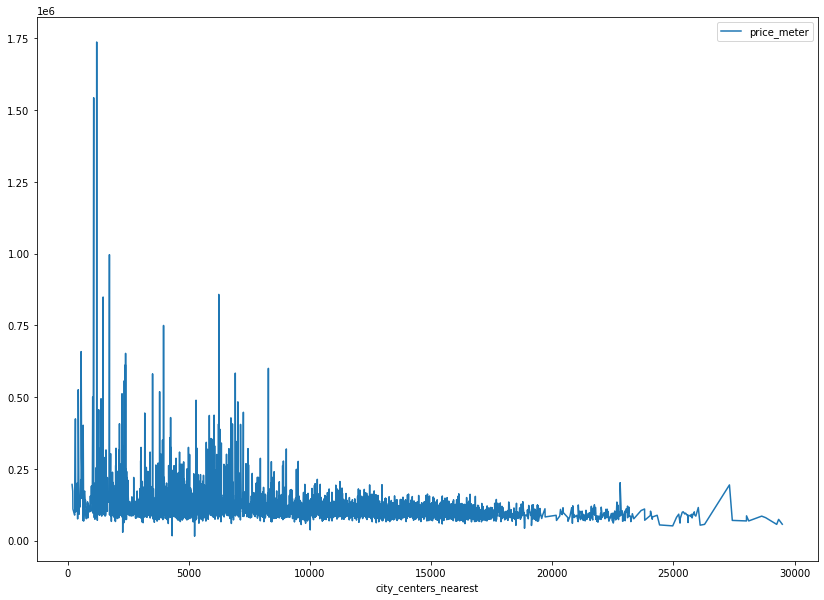

In [142]:
#построим диаграмму рассеивания
locality_centre_pivot.plot(figsize=(14, 10))

Исходя из представленных данных, в целом можно заметить - по убыванию расстояния от центра города стоимость становится ниже. Несмотря на это, при отдалении от центра, цена за квадратный метр колеблется. Это может быть связано с районами, которые находятся в отдалении от непосредственного центра города, но являются элитными (за счет строительства или ,возможно, нахождения в некоем историческом месте города). В общей картине, стоимость квартир уменьшается при отдалении от центра города

5. ОБЩИЙ ВЫВОД

В данном проекте было проведено исследование: выполнение предобработки данных и изучение их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

1. Был открыт файл с данными и изучена общая информация

2. Была выполнена предобработка данных: анализ, заполнение пропусков, обработка аномальных значений, обработка дубликатов, изменение типов данных, категоризация данных для дальнейшей работы. В результате предобработки был сохранени датафрейм на 99%.

3. Добавлены новые столбцы  с новыми параметрами

4. Проведен исследовательский анализ данных

4.1 Изучены основные параметры объектов, такие как: 
- общая площадь. Есть выбросы в виде достаточно больших значений (максимальная общая площадь объекта недвижимости - 900 кв.м.), однако это не сильно влияет на общую картину данных. Среднее значение общей площади равно 60 кв.м, а медиана равна 52 кв.м. Наибольшее количество продаваемых квартир с площадью около 46 кв.м. В среднем наибольшее количество продаваемых объектов недвижимости до 100 кв.м. Квартир более 100 кв.м. гораздо меньше и их количество идёт на спад. В целом приобрести недвижимость возможно на любой вкус: начиная от 12 кв.м до 900 кв.м.

- жилая площадь. Среднее значение жилой площади состаляет 34 кв.м, медианное значение - 30 кв.м. Минимальное значение жилой площади составляет 2 кв.м. Это может быть указанное конкретно жилое пространство в квартирах-студиях, но возможно и значение, которое было внесено ошибочно (указали 2 вместо 20, например). Наибольшее количество предложений продажи с жилой площадью около 16-18 кв.м.Это может быть связано с продажей большого количества однокомнатных квартир или студий. 

- площадь кухни.Наибольшее количество преложений на рынке недвижимости у квартир с площадью кухни около 6 кв.м. Возможно, данные по площади кухни отчасти подтверждают гипотезу, что на рынке недвижимости очень большое предложение на однокомнатные квартиры.

- цена объекта. Медианное значение стоимости квартир составляет 4.3 млн. В среднем, на рынке недвижимости больше всего предложений покупки квартир по стоимости около 3.8 млн. Учитывая, что наибольшее предложение на рынке это однокомнатные квартиры - такая сумма вполне подтверждает данную гипотезу

- количество комнат. Из графика видим, что наибольшее количество предложений это 1-комнатные и 2-комнатные с относительно небольшим отрывом. Исходя из этого можем отчасти подтвердить гипотезу о том, что наиболее часто встречающиеся небольшие площади жилой и кухонной зон небольшие именно из-за того, что больше всего продается однокомнатных квартир. так же это может быть связано с продажей небольших двухкомнатных квартир, в которых хозяева могли объединить одну из комнат с кухней (на данный момент при анализе продающейся недвижимости очень часто можно встретить 2-комнатную квартиру, в которой кухня объеденена с одной из комнат). Данные в которых количество комнат равно 0, можно отнести к продаже квартир-студий.

- высота потолков. Среднее значение высоты потолка составляет 2.7 м. Однако, при этом нужно учитывать тот факт, что мы заполняли пропущенные значения в этом столбце на среднее.

- этаж квартиры. Наиболее частые продажи квартир на 4 этаже

- тип этажа квартиры. Анализируя данные мы видим, что количество продаж квартир на первом и последнем этаже практически одинаковые, на первом всё же немного меньше. В большем количестве продаются квартиры на других этажах

- общее количество этажей в доме. Наиболее часто на рынке недвижимости продают квартиры находящиеся в 5-этажных домах. Квартиры в высотных зданиях продаются на порядок реже. Так же необходимо учитывать, что в данном столбце была доля пропущенных значений.

- расстояние до центра города в метрах. Среднее значение расстояния до центра составляет 14 км, в то время как минимальное - 181 метр, максимальное - почти 66 км. Но так же не будем забывать что в этом столбце находилось достаточно много пропущенных значений.

- расстояние до ближайшего аэропорта. Среднее растояние до аэропорта составляет 28 км. Так же, можно предположить что продается недвижимость в непосредственной близости от аэропорта (значение 0), но так же это может быть и неверно введенными данными. Наибольшее количество квартир на продажу находится на расстоянии около 26 км от ближайшего аэропорта

- расстояние до ближайшего парка. В целом, наибольшее количество недвижимости на продажу находится в близости от парка на расстоянии 500 м. Есть недвижимость непосредственно рядом с парком(1 м). максимальная отдаленность от парка составляет 3.2 км. Но в данном столбце присутствует большое количество пропущенных значений, это тоже необходимо учитывать при дальнейшей работе с данными.

- день и месяц публикации объявления. График продаж в течении года подтверждает понятие "сезонности". Наибольший пик продаж приходится на февраль месяц, затем наблюдается достаточно плавный спад до апреля(включительно). В мае наименьшее количество покупок. Летом средние значения в целом не меняются и начиная с сентября снова начинается рост продаж до ноября(включительно). Спад в декабре-январе может быть связан с большим количеством праздников, либо с отпусками в более теплых странах на праздничные каникулы. Тоже относится и к продажам летом - в целом это сезон отпусков, но тем не менее, как мы можем наблюдать, количество продаж не самое минимальное. Что касается дня недели - наиболее большое количество объявлений появляется в четверг. Самое малое количество выкладываемых объявлений в выходные дни - суббота, воскресенье. Такая разница может быть связана с графиком работы самого риелтора(пятидневный график). Либо возможно, риелторы посещают недвижимость на продажу в выходные дни и в начале недели, и после подготовки и заполнения данных о квартирах (фото, описание) на сайте эти квартиры появляются ближе к четвергу.

4.2 Изучено, как быстро продавались квартиры
В среднем продажа объекта недвижимости составляет 95 дней - 3 месяца это вполне нормальный временной промежуток для продажи.
Быстрыми продажами можно считать сделки, которые совершаются до 50 дней, а максимально долгими - продажа более 200 дней

4.3 Определено, какие факторы больше всего влияют на общую (полную) стоимость объекта (общая площадь, жилая площадь, площадь кухни, количество комнат, этаж, дата размещения объявления)

- Наибольшее влияние на общую стоимость объекта влияет общая площадь (коэф. корр. 0.64) Это не удивительно, данный параметр один из важнейших при выборе недвижимости.
- Следующий - жилая площадь (коэф. корр. 0.50) и затем площадь кухни (коэф. корр. 0.46)
- С ростом количества комнат - увеличивается цена за объект
- Наименьшая цена за квартиры, расположенные на 1 этаже, с небольшим увеличением после следуют квартиры на последнем этаже, и более дорогие - квартиры на других этажах
- Дата размещения. Цена незначительно повышается у квартир, которые были выставлены на продажу во вторник. По воскресеньям стоимость самая низкая. Это довольно интересная зависимость. Возможно, это может быть связано с тем, что риэлторы вначале недели подготавливают новые варинты для продаж, и во вторник выставляется первоначальная цена, которая с последующими днями регулируется по отношению к спросу на рынке недвижимости
Наибольшая стоимость квартир в апреле месяце. А наименьшая в июне. Данная информация потверждает гипотезу - о сезонности рынка недвижимости по месяцам. А именно: постепенный рост стоимости недвижимости с февраля по апрель, затем спад вначале лета (сезон отпусков и соответсвенно, сниженный спрос) и затем небольшие колебания осенью 
Стоимость квартир уменьшалась с 2014 года. Наибольший крутой спад произошел в 2014-2015 годах. Затем начиная с 2018 года стоимость квартир начала постепенно расти. Такой спад может быть связан с имеющимся на тот момент (2014 год) экономическим кризисом и ощутимым спадом доллара

4.4 Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Самая высокая стоимость квадратного метра в Санкт-петербурге, а самая низкая - в Выборге. Таким образом можно предположить - чем дальше от Санкт-Петербурга - тем дешевле недвижимость

4.5 Описано, как стоимость объектов зависит от расстояния до центра города
В целом можно заметить - по убыванию расстояния от центра города стоимость становится ниже. Несмотря на это, при отдалении от центра, цена за квадратный метр колеблется. Это может быть связано с районами, которые находятся в отдалении от непосредственного центра города, но являются элитными (за счет строительства или ,возможно, нахождения в некоем историческом месте города). В общей картине, стоимость квартир уменьшается при отдалении от центра города

Рекомендации по собру данных: изучить и заполнить по возможности большое количество пропусков в столбцах, с картографическими данными(расстояние от центра, ближайщего аэропорта, парка и пруда). Проанализировать аномальные значения по данным (сколько дней было размещено объявление), в них есть аномальные значения, которые объяснить довольно сложно. Добавить столбец с информацией "Причина закрытия объявления" - продажа объекта, отмена продажи, отсутствует оплата за размещение объявления и т.д.